In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df_AliExpress = pd.read_csv("aliexpress_product.csv")
df_AliExpress

,product_name,qty_sold,sales_price,original_price,rating,shipping_cost,store
0,Hip Hop Y2k Retro Black Baggy Jeans for Men Pu...,2 sold,"NGN55,025.61",NaN,NaN,"+Shipping: NGN10,336.95",Planet Street Store
1,Trendline functional cargo pants men's trendse...,NaN,"NGN10,192.84","NGN10,192.84",NaN,Free shipping,Shop1103577477 Store
2,Brand Casual Man Pants Spring Summer Thin Hare...,NaN,"NGN25,787.79",NaN,NaN,NaN,Shop1102821270 Store
3,High quality men's fashion baggy jeans Straigh...,NaN,"NGN23,999.53","NGN69,871.61",NaN,Free shipping,Shop1103658030 Store
4,Men's Overalls Baggy Jeans Shorts Jumpsuits Me...,11 sold,"NGN12,118.58",NaN,NaN,NaN,"Hi, Girl Store"
...,...,...,...,...,...,...,...
195,Plus Size Cargo Pants Men Casual Straight Loos...,NaN,"NGN62,188.68",NaN,NaN,"+Shipping: NGN13,303.57",Jeansame Store
196,Spring Summer New Streetwear Baggy Jeans Men K...,NaN,"NGN34,087.49",NaN,NaN,"+Shipping: NGN16,599.39",VODA MOMO YIGU Store
197,Hip Hop Streetwear Big Boy Jeans Y2K Pattern R...,2 sold,"NGN36,023.93",NaN,NaN,"+Shipping: NGN11,170.58",Akalin Store
198,Baggy Straight Jeans Men American Vintage Wash...,1 sold,"NGN34,467.43",NaN,NaN,"+Shipping: NGN32,063.34",YLSL Store


In [3]:
#perform replace
df_AliExpress['qty_sold'] = df_AliExpress['qty_sold'].str.replace(" sold", "")
df_AliExpress['qty_sold'] =df_AliExpress['qty_sold'].str.replace("+", "")
df_AliExpress['qty_sold'] = df_AliExpress['qty_sold'].str.replace(",", "")

#fill na
df_AliExpress['qty_sold'].fillna(value=0, inplace=True)

In [4]:
#fillna in ratings
df_AliExpress['rating'].fillna(value=0, inplace=True)

In [5]:
#fillna in sales price and remove 'NGN' and the commas 
df_AliExpress['sales_price'] = df_AliExpress['sales_price'].str.replace(",", "")
df_AliExpress['sales_price'] = df_AliExpress['sales_price'].str.replace("NGN", "")

In [6]:
#removing the'NGN' sign
df_AliExpress['original_price'] = df_AliExpress['original_price'].str.replace("NGN", "")

#remove the comma from the original price
df_AliExpress['original_price'] = df_AliExpress['original_price'].str.replace(",", "")

#fillna in original price
df_AliExpress['original_price'].fillna(value=0, inplace=True)

In [7]:
#removing the commas in shipping cost
df_AliExpress['shipping_cost'] = df_AliExpress['shipping_cost'].str.replace(",", "")
#removing the '+shipping tag'
df_AliExpress['shipping_cost'] = df_AliExpress['shipping_cost'].str.replace("+Shipping:", "")
#removing the'NGN' sign
df_AliExpress['shipping_cost'] = df_AliExpress['shipping_cost'].str.replace("NGN", "")
#replacing the"free shipping tags" with ""
df_AliExpress['shipping_cost'] = df_AliExpress['shipping_cost'].str.replace("Free shipping", "0.0")
#fillna in shipping_cost
df_AliExpress['shipping_cost'].fillna(value=0, inplace=True)

In [8]:
df_AliExpress

,product_name,qty_sold,sales_price,original_price,rating,shipping_cost,store
0,Hip Hop Y2k Retro Black Baggy Jeans for Men Pu...,2,55025.61,0,0.0,10336.95,Planet Street Store
1,Trendline functional cargo pants men's trendse...,0,10192.84,10192.84,0.0,0.0,Shop1103577477 Store
2,Brand Casual Man Pants Spring Summer Thin Hare...,0,25787.79,0,0.0,0,Shop1102821270 Store
3,High quality men's fashion baggy jeans Straigh...,0,23999.53,69871.61,0.0,0.0,Shop1103658030 Store
4,Men's Overalls Baggy Jeans Shorts Jumpsuits Me...,11,12118.58,0,0.0,0,"Hi, Girl Store"
...,...,...,...,...,...,...,...
195,Plus Size Cargo Pants Men Casual Straight Loos...,0,62188.68,0,0.0,13303.57,Jeansame Store
196,Spring Summer New Streetwear Baggy Jeans Men K...,0,34087.49,0,0.0,16599.39,VODA MOMO YIGU Store
197,Hip Hop Streetwear Big Boy Jeans Y2K Pattern R...,2,36023.93,0,0.0,11170.58,Akalin Store
198,Baggy Straight Jeans Men American Vintage Wash...,1,34467.43,0,0.0,32063.34,YLSL Store


## EDA TASKS

## 1.Distribution of sales price for baggy amd pants products

In [9]:
df_AliExpress

,product_name,qty_sold,sales_price,original_price,rating,shipping_cost,store
0,Hip Hop Y2k Retro Black Baggy Jeans for Men Pu...,2,55025.61,0,0.0,10336.95,Planet Street Store
1,Trendline functional cargo pants men's trendse...,0,10192.84,10192.84,0.0,0.0,Shop1103577477 Store
2,Brand Casual Man Pants Spring Summer Thin Hare...,0,25787.79,0,0.0,0,Shop1102821270 Store
3,High quality men's fashion baggy jeans Straigh...,0,23999.53,69871.61,0.0,0.0,Shop1103658030 Store
4,Men's Overalls Baggy Jeans Shorts Jumpsuits Me...,11,12118.58,0,0.0,0,"Hi, Girl Store"
...,...,...,...,...,...,...,...
195,Plus Size Cargo Pants Men Casual Straight Loos...,0,62188.68,0,0.0,13303.57,Jeansame Store
196,Spring Summer New Streetwear Baggy Jeans Men K...,0,34087.49,0,0.0,16599.39,VODA MOMO YIGU Store
197,Hip Hop Streetwear Big Boy Jeans Y2K Pattern R...,2,36023.93,0,0.0,11170.58,Akalin Store
198,Baggy Straight Jeans Men American Vintage Wash...,1,34467.43,0,0.0,32063.34,YLSL Store


C:\Users\PC\AppData\Local\Temp\ipykernel_1940\2477148885.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_baggy_pants, x='sales_price', hue='product_name', multiple='stack', kde=True, palette='viridis')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


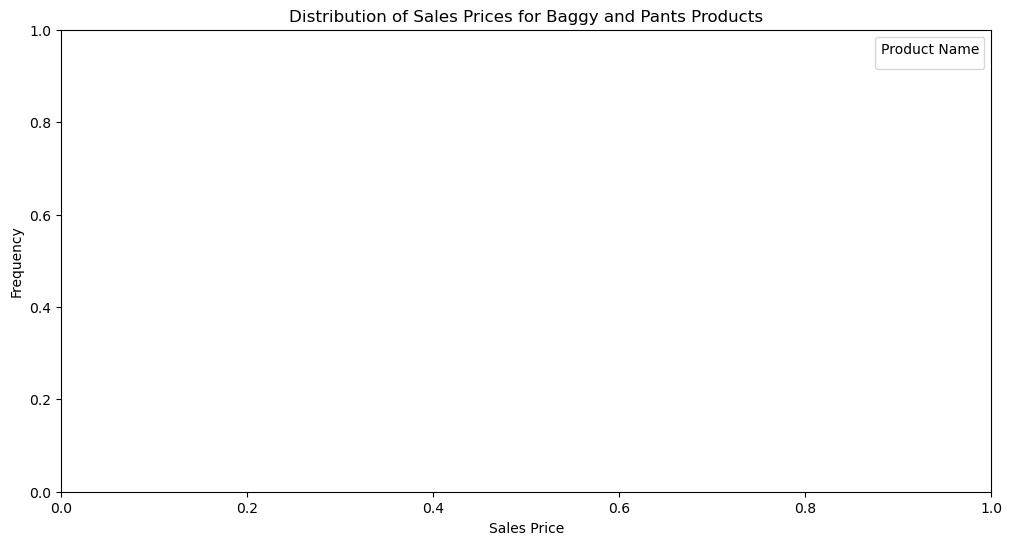

In [10]:
# Filter for Baggy and Pants products
df_baggy_pants = df_AliExpress[df_AliExpress['product_name'].isin(['Baggy', 'Pants'])]

# Ensure sales_price is numeric
df_baggy_pants['sales_price'] = pd.to_numeric(df_baggy_pants['sales_price'])

# Drop rows with missing or zero sales_price
df_baggy_pants = df_baggy_pants.dropna(subset=['sales_price'])
df_baggy_pants = df_baggy_pants[df_baggy_pants['sales_price'] > 0]

# Visualize the distribution of sales prices using a histogram and KDE plot
plt.figure(figsize=(12, 6))
sns.histplot(df_baggy_pants, x='sales_price', hue='product_name', multiple='stack', kde=True, palette='viridis')
plt.xlabel('Sales Price')
plt.ylabel('Frequency')
plt.title('Distribution of Sales Prices for Baggy and Pants Products')
plt.legend(title='Product Name')
plt.show()

## 2.corelation between quantity sold and ratings of the products

In [11]:
#checking the data types
df_AliExpress.dtypes

product_name       object
qty_sold           object
sales_price        object
original_price     object
rating            float64
shipping_cost      object
store              object
dtype: object

In [12]:
#convert to numeric 
df_AliExpress['rating'] = pd.to_numeric(df_AliExpress['rating'])
df_AliExpress['qty_sold'] = pd.to_numeric(df_AliExpress['qty_sold'])

Correlation between rating and quantity sold: nan


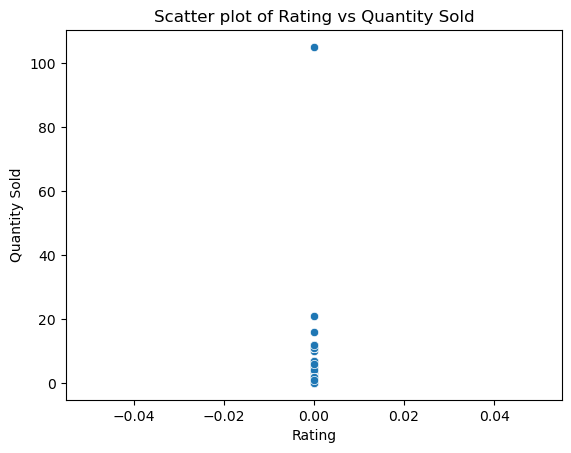

In [13]:
#calculate the corelation
correlation = df_AliExpress['rating'].corr(df_AliExpress['qty_sold'])
print("Correlation between rating and quantity sold:", correlation)

#visualize the correlation
sns.scatterplot(x='rating', y='qty_sold', data=df_AliExpress)
plt.xlabel('Rating')
plt.ylabel('Quantity Sold')
plt.title('Scatter plot of Rating vs Quantity Sold')
plt.show()

## 3. AVERAGE DISCOUNT OFFERED ON BAGGY AND PANTS PRODUCTS

In [14]:
#filter products cointaing 'baggy' or 'pants' in thier names
filtered_df = df_AliExpress[df_AliExpress['product_name'].str.contains('Baggy|Pants',case=False, na=False)]
#convert original price and sales to numeric
filtered_df['original_price'] = pd.to_numeric(filtered_df['original_price'])
filtered_df['sales_price'] = pd.to_numeric(filtered_df['sales_price'])
#filter out roes where price is zero
filtered_df = filtered_df[filtered_df['original_price'] > 0 ]
#calculate the discount as a percentage
filtered_df['discount'] = ((filtered_df['sales_price'] - filtered_df['original_price']) /filtered_df['original_price']) * 100
#calculate thr average discount
average_discount = filtered_df['discount'].mean()
print("Average discount offered on baggy and pants products:", average_discount)

Average discount offered on baggy and pants products: -51.09050874901081


## 4.FIND STORES WITH HIGHEST DISCOUNTS ON THIER PRODUCTS

In [15]:
# Ensure original_price and sales_price are numeric using .loc
df_AliExpress.loc[:, 'original_price'] = pd.to_numeric(df_AliExpress['original_price'])
df_AliExpress.loc[:, 'sales_price'] = pd.to_numeric(df_AliExpress['sales_price'])

# Filter out rows where original_price is zero or missing
df_AliExpress = df_AliExpress[df_AliExpress['original_price'] > 0]
# Calculate discount as a percentage 
df_AliExpress.loc[:, 'discount'] = ((df_AliExpress['original_price'] - df_AliExpress['sales_price']) / df_AliExpress['original_price']) * 100

# Group by store and calculate the average discount for each store
store_discounts = df_AliExpress.groupby('store')['discount'].mean().reset_index()

# Sorting the stores by average discount in descending order
store_discounts = store_discounts.sort_values(by='discount', ascending=False)

# Display the stores with the highest discounts
print(store_discounts)

                            store   discount
14        wetailor Official Store  73.761086
8            Shop1103598458 Store  66.489629
10           Shop1103852396 Store  65.959152
0                All-in-One Store  65.657663
9            Shop1103658030 Store  65.651958
5            Shop1103183813 Store  65.055463
2   Drop Shopping Men Jeans Store  63.892965
3      Excellent Choice Day Store  61.573497
4            Fashion Fusion Store  59.998156
12               YE-Fashion Store  58.531731
11     Something Sells Well Store  57.067651
13         YIN PAI Boutique Store  31.494671
1        CAMO WOLF Official Store        0.0
6            Shop1103571652 Store        0.0
7            Shop1103577477 Store        0.0


C:\Users\PC\AppData\Local\Temp\ipykernel_1940\3111203938.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AliExpress.loc[:, 'discount'] = ((df_AliExpress['original_price'] - df_AliExpress['sales_price']) / df_AliExpress['original_price']) * 100


##  5.shipping cost variation across diffrent regions

In [16]:
# Ensure shipping_cost is numeric
df_AliExpress.loc[:, 'shipping_cost'] = pd.to_numeric(df_AliExpress['shipping_cost'])

# Group by store and calculate the average shipping cost for each store
store_shipping_costs = df_AliExpress.groupby('store')['shipping_cost'].mean().reset_index()

# Sort the stores by average shipping cost in descending order
store_shipping_costs = store_shipping_costs.sort_values(by='shipping_cost', ascending=False)

# Display the stores with the highest average shipping costs
print("Average shipping costs by store:")
print(store_shipping_costs)

# Check if region information is available
if 'region' in df_AliExpress.columns:
    # Group by region and calculate the average shipping cost for each region
    region_shipping_costs = df_AliExpress.groupby('region')['shipping_cost'].mean().reset_index()

    # Sort the regions by average shipping cost in descending order
    region_shipping_costs = region_shipping_costs.sort_values(by='shipping_cost', ascending=False)

    # Display the regions with the highest average shipping costs
    print("Average shipping costs by region:")
    print(region_shipping_costs)
else:
    print("Region information not available in the DataFrame.")

Average shipping costs by store:
                            store shipping_cost
14        wetailor Official Store       22759.2
0                All-in-One Store           0.0
1        CAMO WOLF Official Store           0.0
2   Drop Shopping Men Jeans Store           0.0
3      Excellent Choice Day Store           0.0
4            Fashion Fusion Store           0.0
5            Shop1103183813 Store           0.0
6            Shop1103571652 Store           0.0
7            Shop1103577477 Store           0.0
8            Shop1103598458 Store           0.0
9            Shop1103658030 Store           0.0
10           Shop1103852396 Store           0.0
11     Something Sells Well Store           0.0
12               YE-Fashion Store           0.0
13         YIN PAI Boutique Store           0.0
Region information not available in the DataFrame.


## 6. Significant trends in the quantity sold based on price ranges

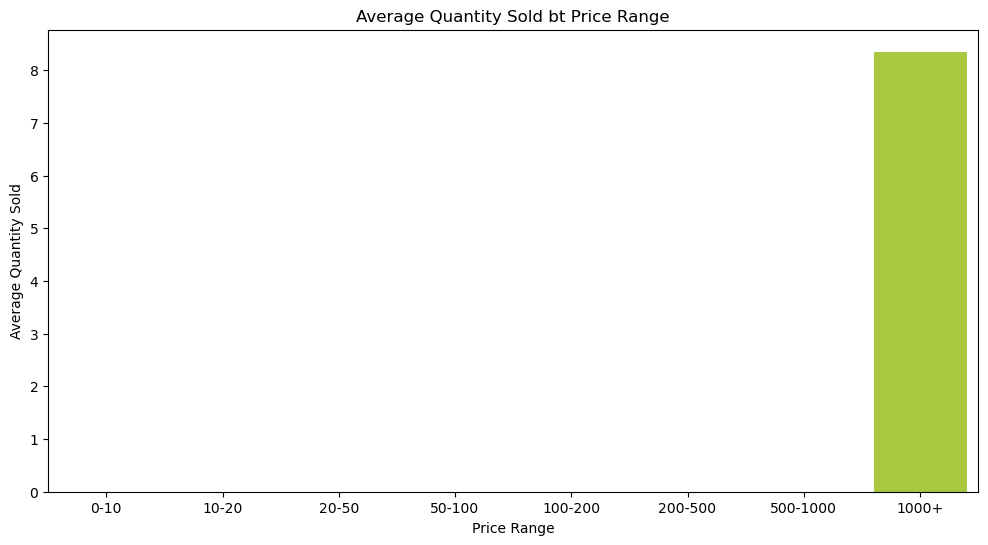

ANOVA test result: <function f_oneway at 0x00000222D908D4E0>


In [17]:
#convert coloumns to numeric
df_AliExpress.loc[:, 'sales_price'] = pd.to_numeric(df_AliExpress.loc[:, 'sales_price'])
df_AliExpress.loc[:, 'qty_sold'] = pd.to_numeric(df_AliExpress.loc[:, 'qty_sold'])

#drop rows with  missing values or zero
df_AliExpress = df_AliExpress.dropna(subset=['sales_price', 'qty_sold'])
df_AliExpress = df_AliExpress[df_AliExpress['sales_price'] > 0]
df_AliExpress = df_AliExpress[df_AliExpress['qty_sold'] > 0]

#create price ranges
bins = [0, 10, 20, 50, 100, 200, 500, 1000, float('inf')]
labels = ['0-10', '10-20', '20-50','50-100', '100-200', '200-500', '500-1000', '1000+']
df_AliExpress['price_range'] = pd.cut(df_AliExpress['sales_price'], bins=bins, labels=labels, right=False)

#group by price ranges and calculate average qty sold
price_range_sales = df_AliExpress.groupby('price_range')['qty_sold'].mean().reset_index()

#visualize the trends using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='price_range', y='qty_sold', data=price_range_sales, palette='viridis')
plt.xlabel('Price Range')
plt.ylabel('Average Quantity Sold')
plt.title ('Average Quantity Sold bt Price Range')
plt.show()

#perform ANOVA test
anova_result = stats.f_oneway
(df_AliExpress[df_AliExpress['price_range'] == '0-10']['qty_sold'],
df_AliExpress[df_AliExpress['price_range'] == '10-20']['qty_sold'],
df_AliExpress[df_AliExpress['price_range'] == '20-50']['qty_sold'],
df_AliExpress[df_AliExpress['price_range'] == '50-100']['qty_sold'],
df_AliExpress[df_AliExpress['price_range'] == '100-200']['qty_sold'],
df_AliExpress[df_AliExpress['price_range'] == '200-500']['qty_sold'],
df_AliExpress[df_AliExpress['price_range'] == '500-1000']['qty_sold'],
df_AliExpress[df_AliExpress['price_range'] == '1000+']['qty_sold'])

print("ANOVA test result:",anova_result)

## 7.relationship between the original price & sales price across diffrent products

Correlation between original price and sales price: 0.31859959400197924


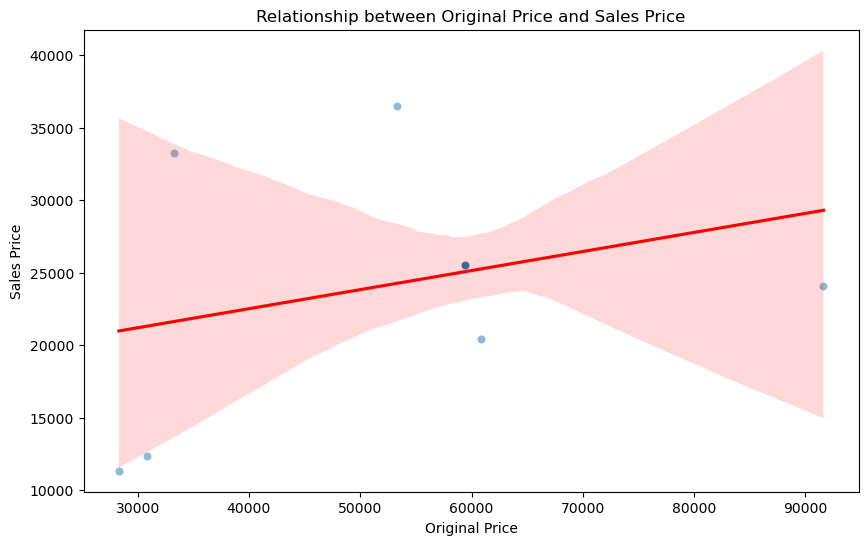

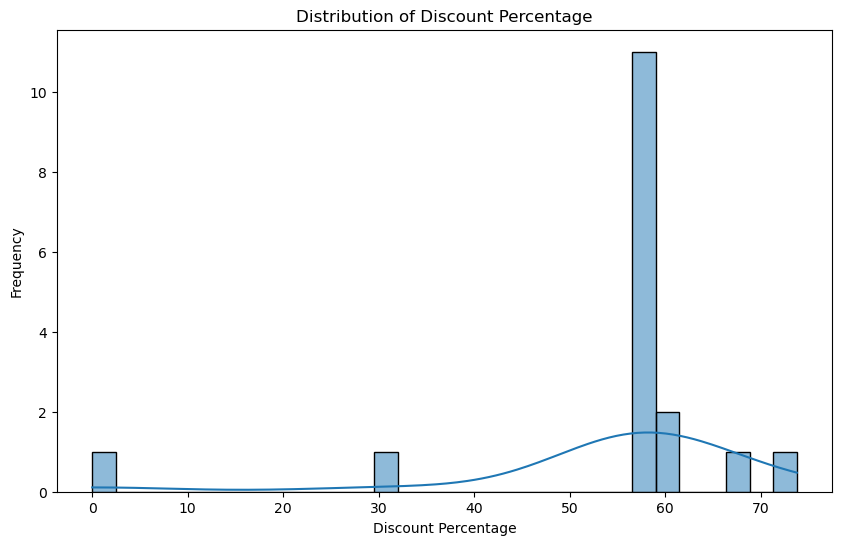

In [18]:
# Ensure original_price and sales_price are numeric
df_AliExpress['original_price'] = pd.to_numeric(df_AliExpress['original_price'], errors='coerce')
df_AliExpress['sales_price'] = pd.to_numeric(df_AliExpress['sales_price'], errors='coerce')

# Drop rows with missing or zero original and sales price
df_AliExpress = df_AliExpress.dropna(subset=['original_price', 'sales_price'])
df_AliExpress = df_AliExpress[(df_AliExpress['original_price'] > 0) & (df_AliExpress['sales_price'] > 0)]

# Calculate the correlation between original price and sales price
correlation = df_AliExpress['original_price'].corr(df_AliExpress['sales_price'])
print(f'Correlation between original price and sales price: {correlation}')

# Visualize the relationship using a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='original_price', y='sales_price', data=df_AliExpress, alpha=0.5)
sns.regplot(x='original_price', y='sales_price', data=df_AliExpress, scatter=False, color='red')
plt.xlabel('Original Price')
plt.ylabel('Sales Price')
plt.title('Relationship between Original Price and Sales Price')
plt.show()

# Calculate the discount percentage
df_AliExpress['discount_percentage'] = ((df_AliExpress['original_price'] - df_AliExpress['sales_price']) / df_AliExpress['original_price']) * 100

# Visualize the distribution of discount percentage
plt.figure(figsize=(10, 6))
sns.histplot(df_AliExpress['discount_percentage'], bins=30, kde=True)
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Discount Percentage')
plt.show()